In [1]:
import pandas as pd #Biblioteca para amnipulação de dados
import matplotlib.pyplot as plt #Biblioteca principal de visualizaçõa de dados e configuraçõa dos gráficos
import seaborn as sns #Biblioteca auxiliar de visualização de dados

In [2]:
df = pd.read_csv("../Dados/yulu_bike_sharing_dataset.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.dtypes #Os tipos das colunas

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
df.isna().sum() #Valores vazios

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [50]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Analisando os dados, vemos que não há valores faltantes, mas apresenta outliers nas colunas(count, registered, casual, windspeed), mas antes de remove-los vamos analisar o boxplot desses dados e depois analisar se esses outliers são um padrão de alguma época do ano ou dia do mês, ou se realmente é só um dados aleatório que pode ser removido sem muitos problemas

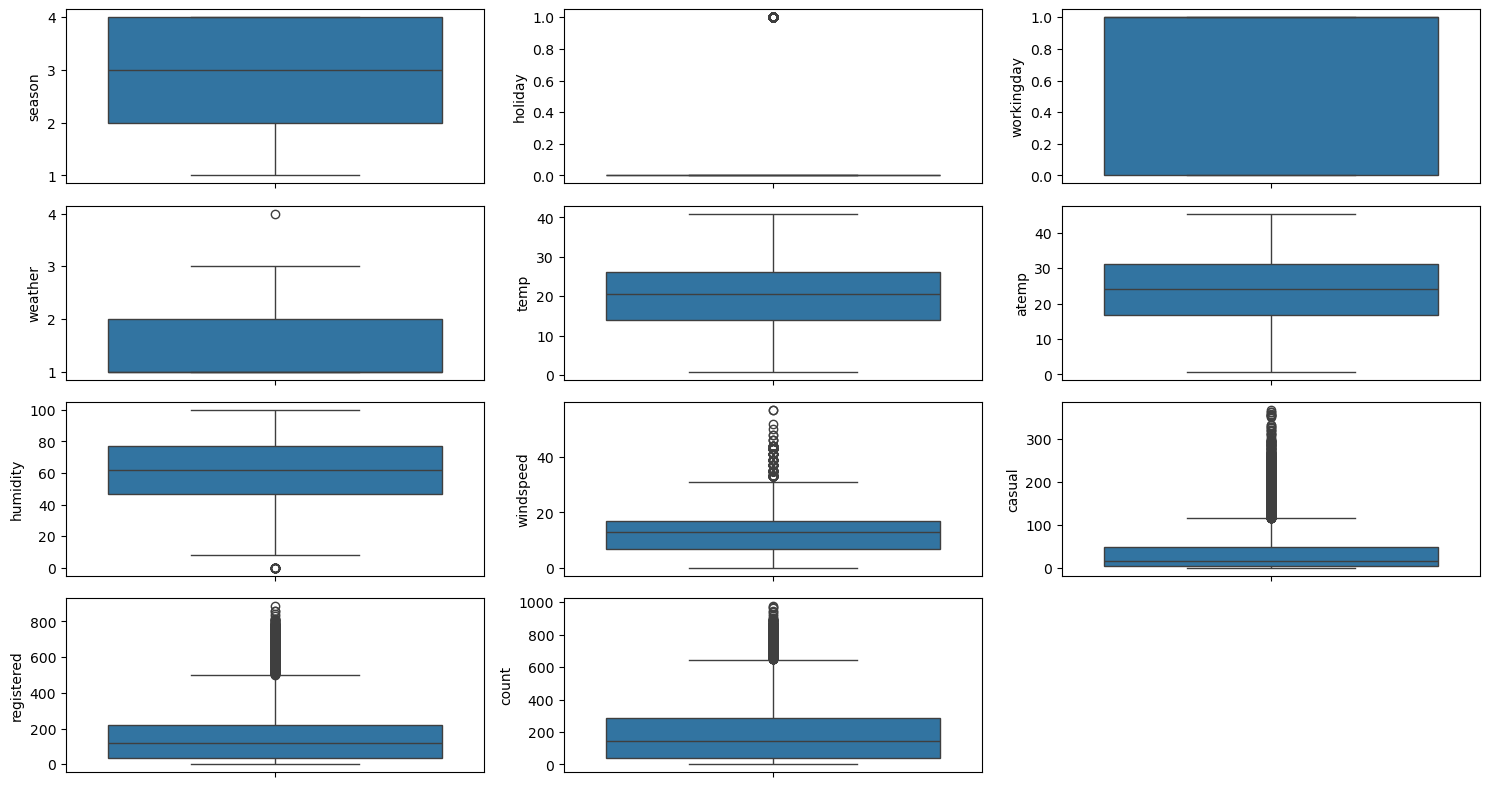

In [51]:
colunasNumericas = df.select_dtypes(include = "number").columns

numeroCols = len(colunasNumericas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(colunasNumericas):
    plt.subplot(numeroCols, 3, i+1)
    sns.boxplot(df[coluna])
plt.tight_layout()
plt.show()

Após essa analise, fica claro que as colunas(count, casual, registered e windspeed) apresentam outliers! Mas como nosso objetivo não é criar um modelo de machine learning mas entender as colunas que apresentam um impacto na count(Quantidade total de biscicletas que foram alugadas) para criar uma estratégia para empresa, vamos analisar como esses dados se comportam, mas antes vamos ver a magnetude desse ouliers no nosso data set.

In [52]:
def magnetudeOutlier(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limiteSuperior = Q3 + 1.5 * IQR  

    dfOutliers = df[df[coluna] > limiteSuperior]
    outlierPorcentagem = (dfOutliers.shape[0]/df.shape[0])*100
    print(f"A coluna {coluna} apresenta um total de {outlierPorcentagem:.2f}% de outlier")

magnetudeOutlier(df, "count")
magnetudeOutlier(df, "registered")
magnetudeOutlier(df, "casual")
magnetudeOutlier(df, "windspeed")




A coluna count apresenta um total de 2.76% de outlier
A coluna registered apresenta um total de 3.89% de outlier
A coluna casual apresenta um total de 6.88% de outlier
A coluna windspeed apresenta um total de 2.09% de outlier


As colunas testadas, apresentam um percentual até que pequeno comparado ao data set completo, logo isso indica esses outliers podem ser dias mais lucrativos ou eventos que podem ter acontecido, sabendo disso, vou fazer um grafico de linha para anlizar como esses dados se comportam durante os meses do ano!

In [53]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["mes"] = df['datetime'].dt.to_period("M").astype(str)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,mes
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  mes         10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


Agora com a coluna no tipo correto, posso começar as analises sasonais!

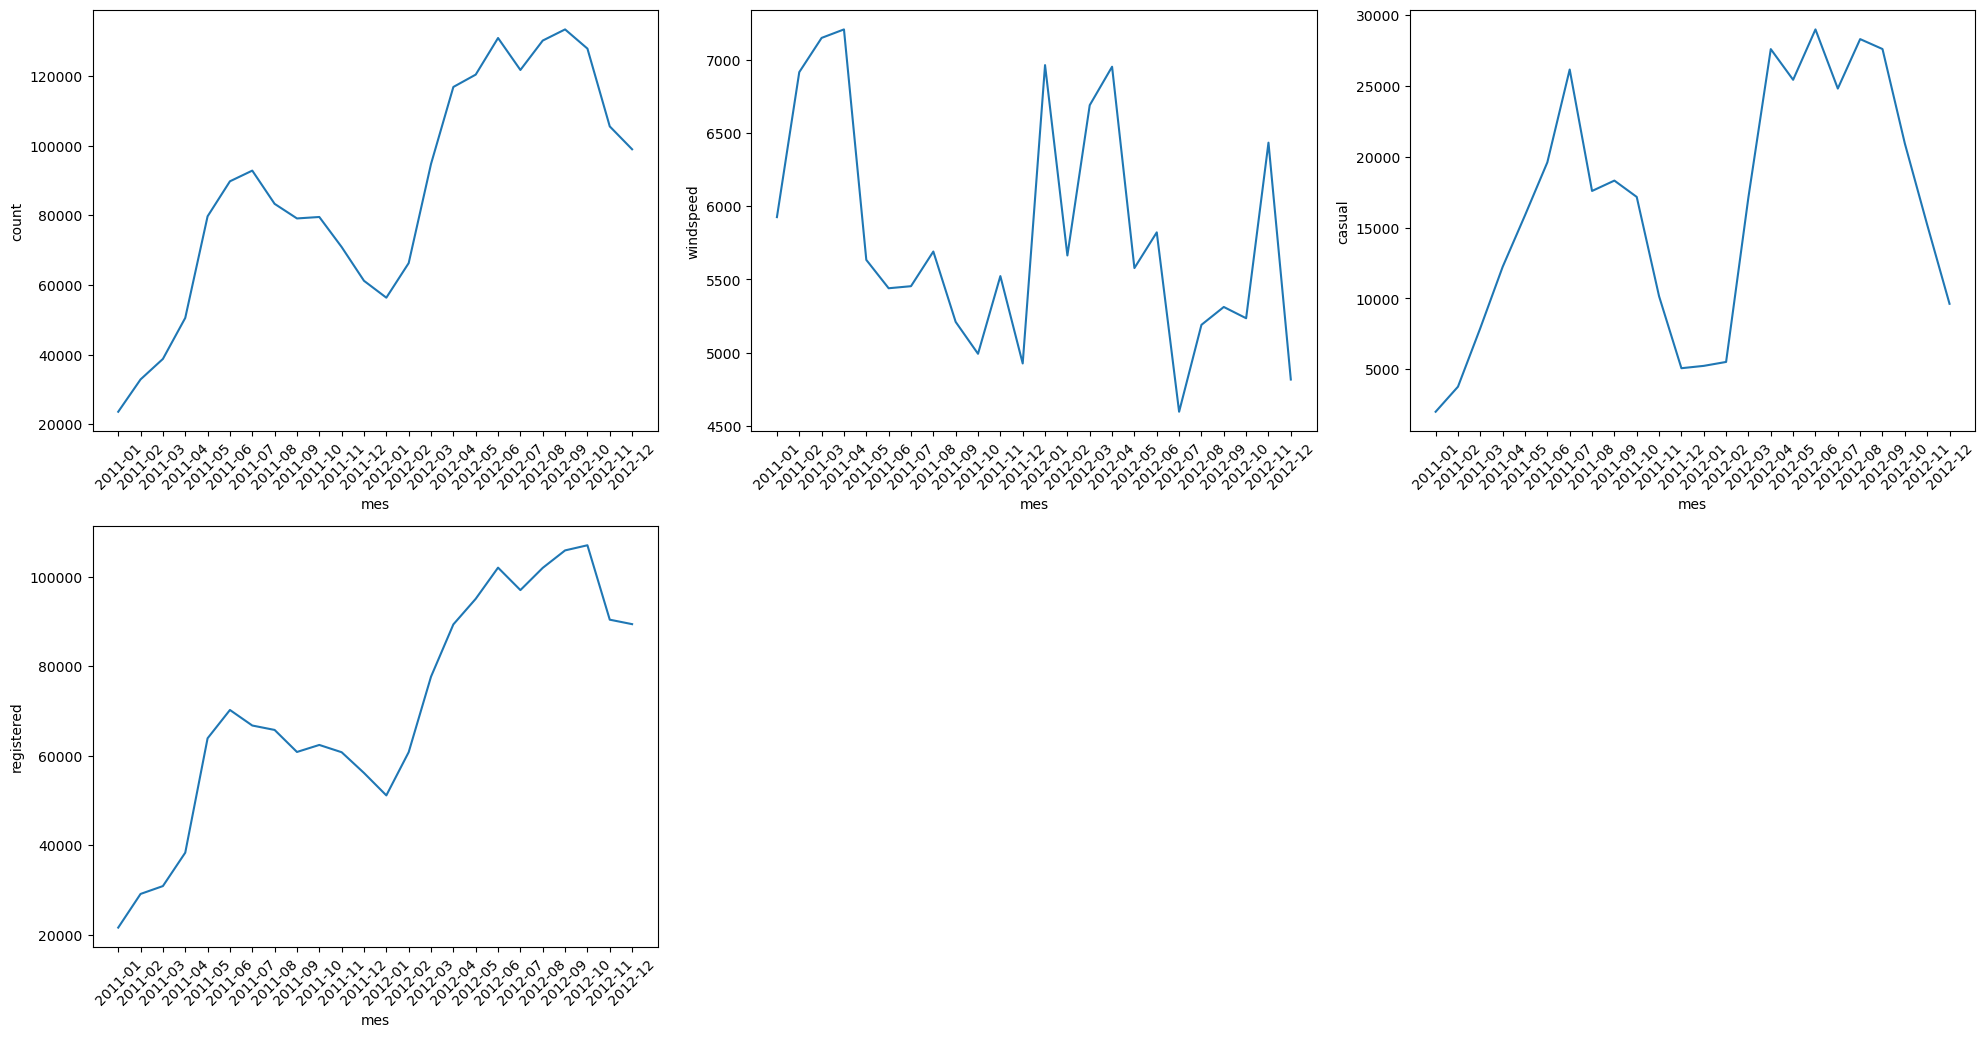

In [55]:
analiseMes = df[["mes", "count", "windspeed", "casual", "registered"]]. groupby("mes").sum().reset_index()
colunasNumericas = analiseMes.select_dtypes(include = "number").columns

numeroCols = len(colunasNumericas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[20, 10 * numeroLinhas])
for i, coluna in enumerate(colunasNumericas):
    plt.subplot(numeroCols, 3, i+1)
    sns.lineplot(data=analiseMes, x="mes", y=coluna)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A coluna count teve 2.76% de dados identificados como outliers e removidos.
A coluna registered teve 4.32% de dados identificados como outliers e removidos.
A coluna casual teve 10.49% de dados identificados como outliers e removidos.
A coluna windspeed teve 12.37% de dados identificados como outliers e removidos.


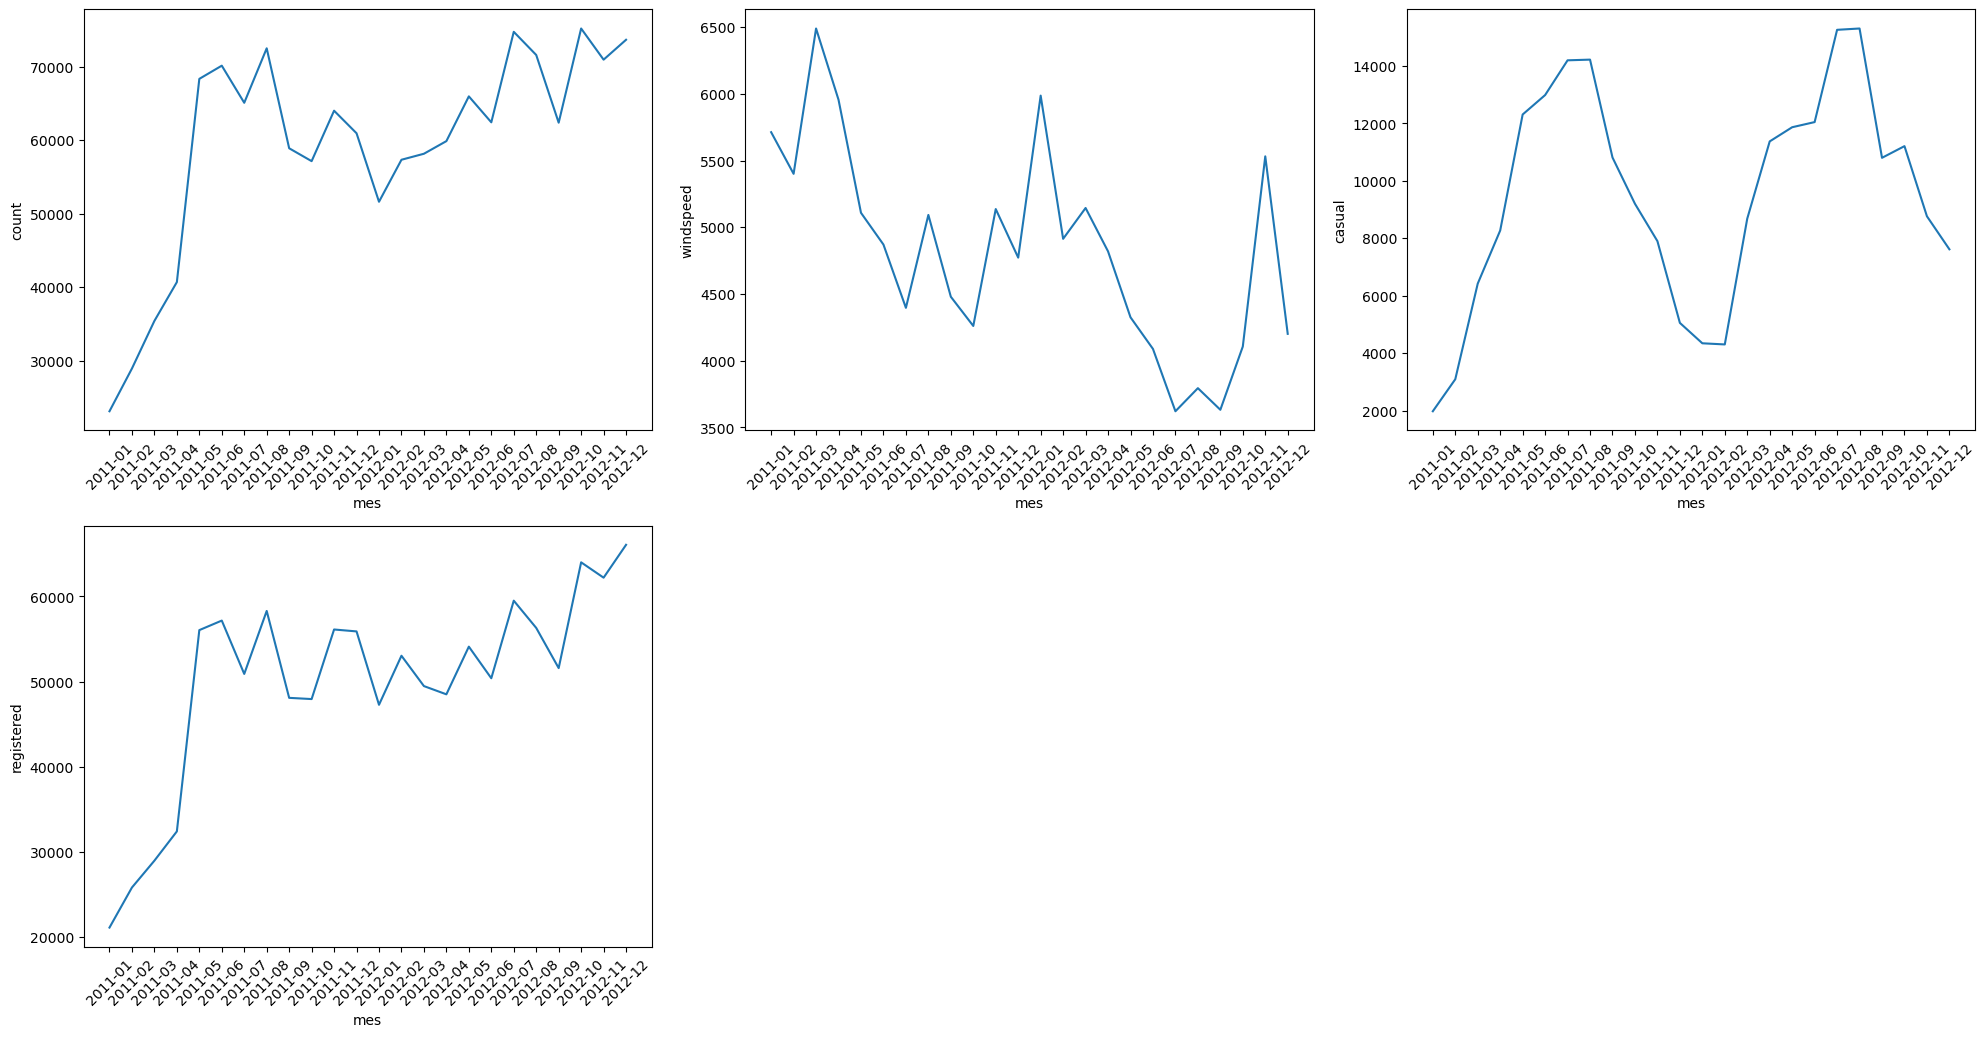

(9539, 13)

In [56]:
def removerOutliers(df, colunas):

    df_limpo = df.copy()  # Cria uma cópia do DataFrame original para preservá-lo
    
    for coluna in colunas:
        Q1 = df[coluna].quantile(0.25)  # Primeiro quartil
        Q3 = df[coluna].quantile(0.75)  # Terceiro quartil
        IQR = Q3 - Q1  # Intervalo interquartil
        
        # Definindo os limites inferior e superior
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Filtrando os dados para remover os outliers
        df_limpo = df_limpo[(df_limpo[coluna] >= limite_inferior) & (df_limpo[coluna] <= limite_superior)]
        
        # Calculando e exibindo a porcentagem de outliers removidos
        outlier_porcentagem = (1 - len(df_limpo) / len(df)) * 100
        print(f"A coluna {coluna} teve {outlier_porcentagem:.2f}% de dados identificados como outliers e removidos.")
    
    return df_limpo

# Chamando a função
colunas_para_limpeza = ["count", "registered", "casual", "windspeed"]
df_sem_outliers = removerOutliers(df, colunas_para_limpeza)

analiseMesSemOutilier = df_sem_outliers[["mes", "count", "windspeed", "casual", "registered"]]. groupby("mes").sum().reset_index()
colunasNumericas = analiseMes.select_dtypes(include = "number").columns

numeroCols = len(colunasNumericas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[20, 10 * numeroLinhas])
for i, coluna in enumerate(colunasNumericas):
    plt.subplot(numeroCols, 3, i+1)
    sns.lineplot(data=analiseMesSemOutilier, x="mes", y=coluna)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_sem_outliers.shape


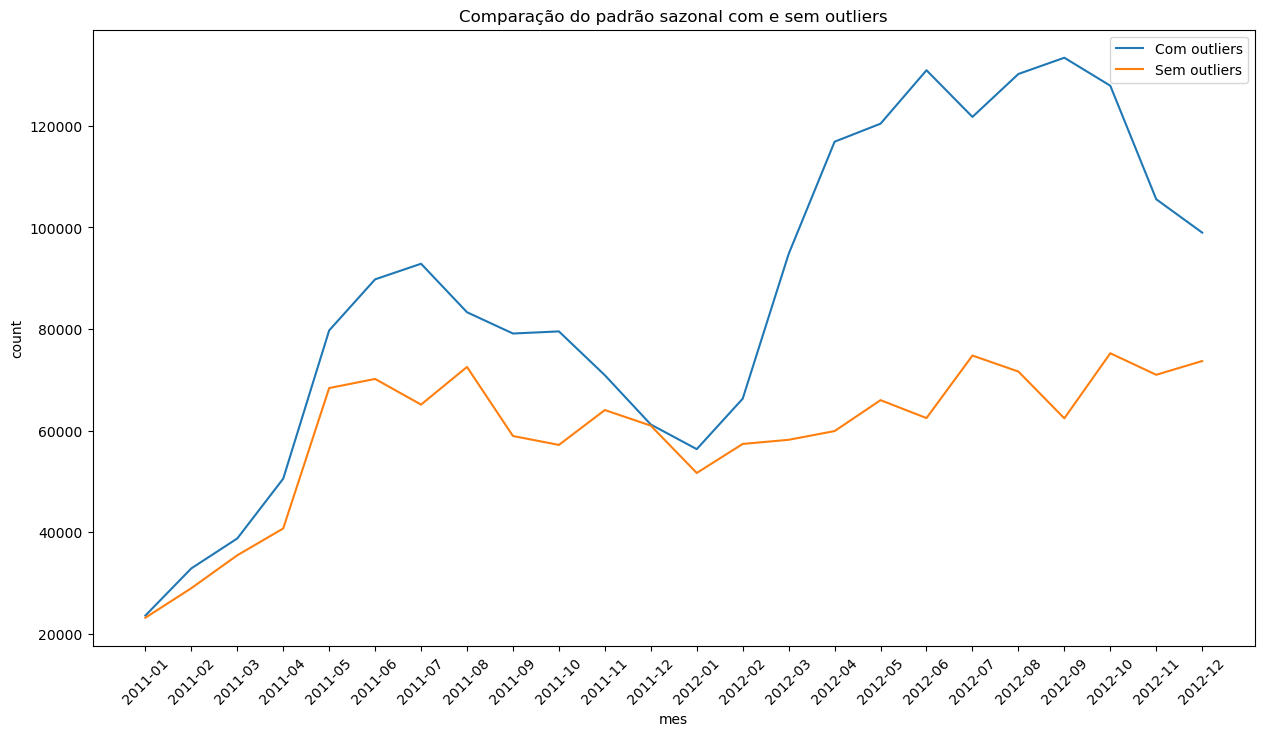

In [57]:


plt.figure(figsize=(15,8))
sns.lineplot(data=analiseMes, x='mes', y='count', label='Com outliers')
sns.lineplot(data=analiseMesSemOutilier, x='mes', y='count', label='Sem outliers')
plt.title('Comparação do padrão sazonal com e sem outliers')
plt.xticks(rotation=45)
plt.legend()


## Análise e Insights

### Queda no início e no final do ano

- Nesses períodos, as pessoas costumam estar de férias, viajando ou saindo menos de casa para trabalhar.
- Isso explica a baixa demanda, o que é normal e ajuda a entender melhor a sazonalidade do serviço de bicicletas.

### Aumento da demanda no meio do ano

- A necessidade por bicicletas cresce significativamente nessa época.
- Esse insight é valioso para a empresa planejar estratégias de aluguel.

### Clientes registrados são os mais rentáveis

- Eles são os que mais utilizam as bicicletas da empresa.
- Podem ser o público-alvo principal para estratégias de fidelização e promoções.

## Próximos Passos
3
Agora, vou analisar se há alguma relação entre os aluguéis e os dias ou épocas do ano para identificar possíveis influências. 

### Manutenção dos Outliers

Decidi manter os outliers na análise, pois:
- Eles mostram um padrão que, mesmo sem outliers, também aparece, mas em ocasiões específicas.
- Esses outliers podem indicar festas ou eventos onde o uso das bicicletas aumenta significativamente.
- Essa observação é muito valiosa para a empresa, pois permite o planejamento de estratégias específicas para esses períodos do ano.


<Axes: xlabel='hora', ylabel='count'>

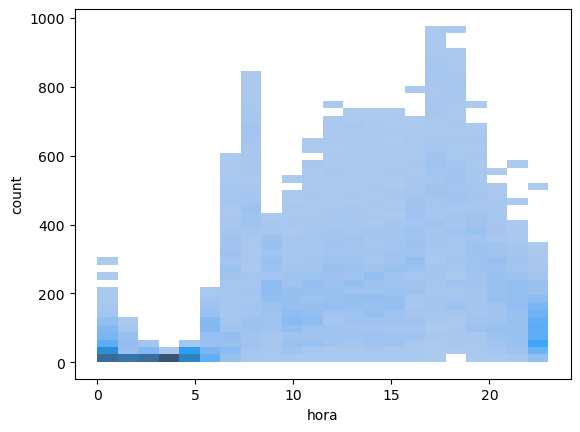

In [ ]:
df['hora'] = df['datetime'].dt.hour #Coluna que diz a hora que a bicicleta foi usada
sns.histplot( x = df["hora"],  y = df["count"])

### Análise de Utilização de Bicicletas por Hora do Dia

Com base nos dados analisados, foi possível identificar padrões claros de utilização das bicicletas ao longo do dia. A relação entre o horário e a quantidade de aluguéis apresenta os seguintes comportamentos:

#### **Picos de Utilização**

* **Manhã (7h às 9h):** Os aluguéis atingem um dos pontos mais altos nesse período, indicando que muitos usuários utilizam as bicicletas para deslocamentos matinais, como ir ao trabalho ou escola.
* **Fim da Tarde (16h às 19h):** Outro pico significativo é observado nesse horário, possivelmente refletindo o retorno das pessoas para casa após suas atividades diárias.

#### **Baixa Utilização**

* **Madrugada (0h às 5h):** A quantidade de aluguéis é muito baixa nesse período, o que pode ser explicado pela ausência de atividades e deslocamentos típicos durante a madrugada.

#### **Horários Intermediários**

* Durante o período de 10h às 15h, observa-se uma quantidade moderada de aluguéis. Esse comportamento pode estar associado ao uso para lazer, pequenas tarefas ou deslocamentos que não seguem os horários de pico relacionados ao trabalho ou estudo.

Esse padrão de utilização reflete as rotinas diárias dos usuários e mostra como a demanda por bicicletas varia conforme o horário do dia.


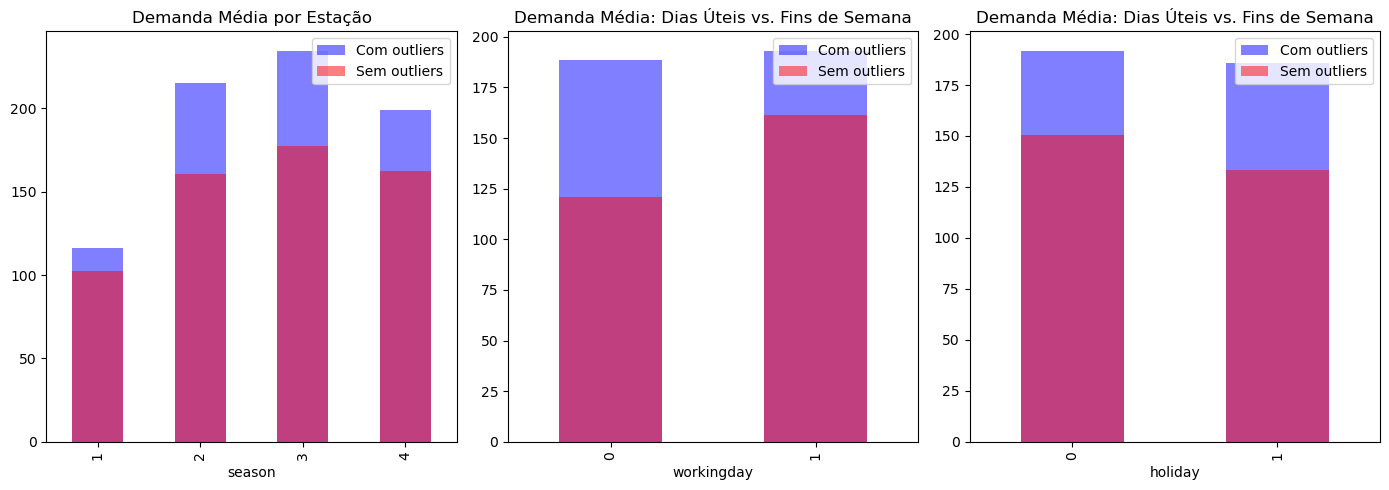

In [58]:
# Gráfico de barras comparando médias  
fig, ax = plt.subplots(1, 3, figsize=(14, 5))  

# (1) Sazonalidade  
df.groupby('season')['count'].mean().plot(kind='bar', ax=ax[0], color='blue', alpha=0.5, label='Com outliers')  
df_sem_outliers.groupby('season')['count'].mean().plot(kind='bar', ax=ax[0], color='red', alpha=0.5, label='Sem outliers')  
ax[0].set_title('Demanda Média por Estação')  
ax[0].legend()  

# (2) Dias úteis vs. feriados  
df.groupby('workingday')['count'].mean().plot(kind='bar', ax=ax[1], color='blue', alpha=0.5, label='Com outliers')  
df_sem_outliers.groupby('workingday')['count'].mean().plot(kind='bar', ax=ax[1], color='red', alpha=0.5, label='Sem outliers')  
ax[1].set_title('Demanda Média: Dias Úteis vs. Fins de Semana')  
ax[1].legend()  

df.groupby('holiday')['count'].mean().plot(kind='bar', ax=ax[2], color='blue', alpha=0.5, label='Com outliers')  
df_sem_outliers.groupby('holiday')['count'].mean().plot(kind='bar', ax=ax[2], color='red', alpha=0.5, label='Sem outliers')  
ax[2].set_title('Demanda Média: Dias Úteis vs. Fins de Semana')  
ax[2].legend()  


plt.tight_layout()  
plt.show()  


### Análise Comparativa: Padrões com e sem Outliers

A análise dos dados com e sem outliers confirmou que os padrões principais se mantêm consistentes em todas as variáveis-chave (`season`, `holiday`, `workingday`). As diferenças observadas estão principalmente na magnitude dos valores, mas não na tendência central ou na hierarquia de importância.

### 3 1. Sazonalidade (`season`)

#### Padrão Identificado:
- **Com outliers:**
  - Verão (`season=3`) e outono (`season=2`) apresentam os maiores picos de demanda.
  - Valores extremamente altos em junho, julho e agosto.
- **Sem outliers:**
  - A diferença entre verão/outono e outras estações diminui, mas a ordem se mantém.
  - O verão ainda é a estação com maior demanda média, seguido pelo outono.

#### Conclusão:
- Os outliers intensificam a diferença entre as estações, mas não alteram o fato de que verão e outono são os períodos de maior uso.

### 2. Dias Úteis vs. Feriados (`workingday` e `holiday`)

#### Padrão Identificado:
- **Com outliers:**
  - Dias úteis (`workingday=1`) têm demanda muito superior a feriados/fins de semana.
  - Alguns dias úteis apresentam valores extremos (possivelmente devido a eventos ou condições climáticas excepcionais).
- **Sem outliers:**
  - A diferença entre dias úteis e não úteis permanece nítida, mas menos acentuada.
  - Feriados (`holiday=1`) continuam com demanda baixa, sem variações significativas.

#### Conclusão:
- Os outliers aumentam a discrepância entre dias úteis e feriados, mas não mudam o comportamento básico:
  - As bicicletas são usadas principalmente para trabalho/rotina.
  - Feriados e fins de semana têm demanda residual, independentemente de outliers.

Agora irei analisar se o tempo tem alguma relação com o uso das bicicletas, pois como foi visto anteriormente, no verão é a estação que mais apresentam uso das bicicletas, logo o tempo deve influenciar nisso, já que no verão o tempo é mais fresco e não tem muitas chuvas, o que colabora para a utilização das bicicletas!

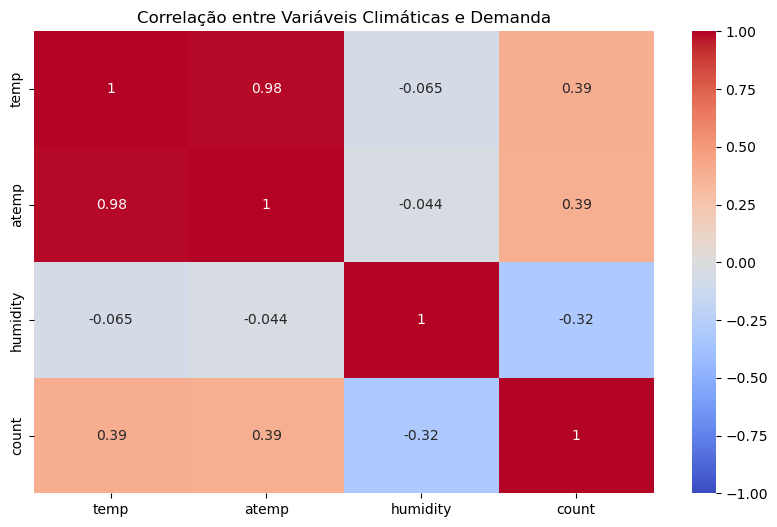

In [59]:
correlaçãoTempoComAluguelBicicletas = df[["temp", "atemp", "humidity", "count"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlaçãoTempoComAluguelBicicletas, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlação entre Variáveis Climáticas e Demanda")
plt.show()



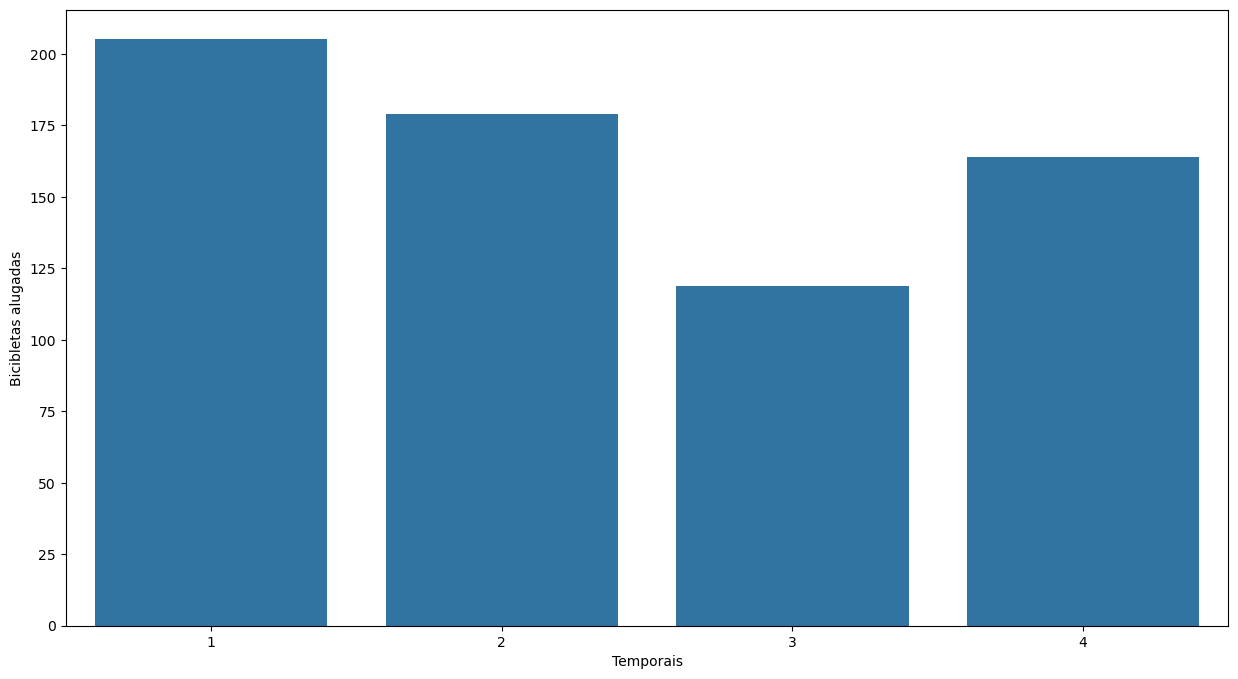

In [60]:
#Media de aluguel de bicicletas por temporal
#1. Céu limpo, poucas nuvens, parcialmente nublado, parcialmente encoberto.
#2. Névoa com céu nublado, névoa com nuvens fragmentadas, névoa com poucas nuvens, névoa.
#3. Neve leve, chuva leve com trovões e nuvens dispersas, chuva leve com nuvens dispersas.
#4. Chuva forte com granizo, trovões e névoa; neve com nevoeiro.
plt.figure(figsize=[15, 8])
mediaBicicletasTemporal = df[["count", "weather"]].groupby("weather").mean().reset_index()
sns.barplot(mediaBicicletasTemporal, x = "weather", y = "count")
plt.xlabel("Temporais")
plt.ylabel("Bicibletas alugadas")
plt.show()

### Confirmação da Análise Climática

Os dados comprovaram exatamente o que esperávamos: quando o tempo esquenta e a umidade cai, o uso das bicicletas dispara. Essa tendência é ainda mais forte no verão, mostrando que as pessoas realmente preferem pedalar em dias quentes e secos. Além disso, o clima de tipo 1 (céu limpo ou com poucas nuvens) se mostrou como o melhor para incentivar o uso das bicicletas, destacando-se como o cenário ideal para atividades ao ar livre.

A correlação positiva com a temperatura (+40%) e negativa com a umidade (-30%) confirma o padrão que já havíamos observado na análise sazonal. Ou seja, não foi coincidência - os clientes da Yulu realmente usam mais as bikes quando o clima está favorável.

Essa descoberta reforça a importância de:

* Ajustar a frota conforme as previsões do tempo
* Planejar promoções nos períodos de calor
* Comunicar melhor os benefícios de pedalar em dias bonitos

Com essas informações em mãos, fica mais fácil tomar decisões certeiras para o negócio.


## Conclusão da Análise

A análise dos dados revelou padrões consistentes no uso das bicicletas Yulu, destacando três fatores-chave:

1. **Sazonalidade marcante**: A demanda apresenta variações significativas ao longo do ano, com os meses mais quentes registrando maior utilização, enquanto os períodos de férias mostram redução natural no uso.

2. **Padrão diário previsível**: 
   - Horários de deslocamento (manhã e final da tarde) concentram a maior demanda
   - Períodos noturnos e madrugada apresentam utilização reduzida

3. **Perfil de usuário claro**:
   - Clientes registrados são os principais usuários
   - Dias úteis têm demanda consistentemente maior
   - Feriados e fins de semana apresentam padrão distinto de uso

**Recomendações Estratégicas**:
1. Ajustar a distribuição de frota para atender aos horários de maior demanda
2. Desenvolver programas de fidelidade para usuários frequentes
3. Otimizar a manutenção durante os períodos de baixa utilização

Estes padrões demonstram como fatores sazonais, horários e perfis de usuário influenciam significativamente a demanda, oferecendo à Yulu oportunidades concretas para:
- Melhorar a alocação de recursos
- Aprimorar a experiência do usuário
- Aumentar a eficiência operacional

Ao alinhar suas operações com esses padrões naturais de uso, a Yulu pode fortalecer sua posição no mercado de mobilidade urbana.